# Deep Learning Exercise 2


Ex No. 2: Feed Forward & Back-Propagation Learning Algorithm for  Multiple Perceptron

Implement the feedforward and backpropagation learning algorithm for multiple perceptrons in Python for the question provided in the attached image.
Initialize the weights and biases randomly.
Implement the forward pass.
Compute the loss between the predicted output and the actual output using an appropriate loss function.
Compute the gradients of the loss function with respect to the weights and biases using the chain rule.
Update the weights and biases.
Iterate over multiple times (epochs), performing forward propagation, loss calculation, backpropagation, and parameter updates in each iteration till convergence.


In [1]:
#Importing Required Libraries
import numpy as np

In [2]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
# Derivative Of Sigmoid Function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [4]:
class NeuralNetwork:
    # intializing the weights and biases
    def __init__(self,learning_rate=1):
        self.weights0_1 = np.random.rand(3, 2)
        self.weights1_2 = np.random.rand(3, 2)
        self.learning_rate = learning_rate

    def feedforward(self):
        self.hidden_layer_output = sigmoid(np.dot(self.input, self.weights0_1))
        # adding a bias term to the hidden layer
        self.hidden_layer_output = np.array([np.append(self.hidden_layer_output[0],1)])
        self.output = sigmoid(np.dot(self.hidden_layer_output, self.weights1_2))

    def backprop(self):
        #Application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights1_2 = np.dot(self.hidden_layer_output.T, (2*(self.output - self.y) * sigmoid_derivative(self.output)))
        back_prop_weights_1_2 = np.array([self.weights1_2[0],self.weights1_2[1]])
        back_prop_hidden_layer_output = np.array((self.hidden_layer_output[0][0],self.hidden_layer_output[0][1]))
        d_weights0_1 = np.dot(self.input.T,  (np.dot(2*(self.output - self.y) * sigmoid_derivative(self.output), back_prop_weights_1_2.T) * sigmoid_derivative(back_prop_hidden_layer_output)))

        #Applying gradient descent to update the weights
        self.weights1_2 -= self.learning_rate * d_weights1_2
        self.weights0_1 -= self.learning_rate * d_weights0_1


    # function to train the model
    def train(self, x, y,epochs=1000,early_stopping = True):
        self.input = x
        self.y = y
        loss = []
        for i in range(epochs):
            self.feedforward()
            self.backprop()
            # print(f"output at iteration {i} : {self.output}")
            print(f"Loss at iteration {i} : {self.mse()}")
            loss.append(self.mse())
            # print(f"weights at at iteration {i} : {self.return_weights()}")
            # defining stopping criterion if MSE is less than 0.0001
            if self.mse() < 0.0001 and early_stopping:
                print(f"Neural Network Converged at epoch {i} with loss {self.mse()}")
                break
        return loss


    # loss function
    def mse(self):
        return np.mean(np.square(self.y - self.output))
    # function to print the weights of the model when called
    def return_weights(self):
        return f"weights0_1 : {self.weights0_1} \nweights1_2 : {self.weights1_2}"

In [5]:
# creating a neural network object
nn = NeuralNetwork()

In [6]:
# training the model
nn.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]))

Loss at iteration 0 : 0.3173107078236735
Loss at iteration 1 : 0.20492667582955593
Loss at iteration 2 : 0.12179236566550769
Loss at iteration 3 : 0.07260507995721742
Loss at iteration 4 : 0.045631263159279886
Loss at iteration 5 : 0.03051325369272403
Loss at iteration 6 : 0.021551750800368915
Loss at iteration 7 : 0.01591647445296155
Loss at iteration 8 : 0.01218240418452915
Loss at iteration 9 : 0.009596612703723868
Loss at iteration 10 : 0.007739111375693315
Loss at iteration 11 : 0.006363357168146768
Loss at iteration 12 : 0.005317899602729279
Loss at iteration 13 : 0.0045059427099266225
Loss at iteration 14 : 0.0038634560533867546
Loss at iteration 15 : 0.0033467971756354275
Loss at iteration 16 : 0.002925432423488144
Loss at iteration 17 : 0.002577503760022871
Loss at iteration 18 : 0.002287043487461737
Loss at iteration 19 : 0.002042175075481899
Loss at iteration 20 : 0.001833921771393888
Loss at iteration 21 : 0.0016553999078722501
Loss at iteration 22 : 0.001501261617179693
Lo

[0.3173107078236735,
 0.20492667582955593,
 0.12179236566550769,
 0.07260507995721742,
 0.045631263159279886,
 0.03051325369272403,
 0.021551750800368915,
 0.01591647445296155,
 0.01218240418452915,
 0.009596612703723868,
 0.007739111375693315,
 0.006363357168146768,
 0.005317899602729279,
 0.0045059427099266225,
 0.0038634560533867546,
 0.0033467971756354275,
 0.002925432423488144,
 0.002577503760022871,
 0.002287043487461737,
 0.002042175075481899,
 0.001833921771393888,
 0.0016553999078722501,
 0.001501261617179693,
 0.00136730278824758,
 0.0012501826836662888,
 0.0011472203760971638,
 0.0010562449095314667,
 0.0009754836039771954,
 0.0009034778189961515,
 0.0008390187388563737,
 0.0007810979302675251,
 0.0007288689201859409,
 0.0006816170788326022,
 0.0006387358218324978,
 0.0005997076633623168,
 0.0005640890244887732,
 0.0005314979712817445,
 0.0005016042556208282,
 0.0004741211784389655,
 0.000448798904789929,
 0.00042541894267909586,
 0.00040378956023687766,
 0.00038374196369531

In [7]:
# getting different loss arrays for comparison with different learning rates
nn_l1 = NeuralNetwork(learning_rate=0.1)
nn_l2 = NeuralNetwork(learning_rate=0.5)
nn_l3 = NeuralNetwork(learning_rate=1)
nn_l4 = NeuralNetwork(learning_rate=5)

loss_list_l1 = nn_l1.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]),early_stopping=False,epochs=100)
loss_list_l2 = nn_l2.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]),early_stopping=False,epochs=100)
loss_list_l3 = nn_l3.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]),early_stopping=False,epochs=100)
loss_list_l4 = nn_l4.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]),early_stopping=False,epochs=100)

Loss at iteration 0 : 0.27134323549689776
Loss at iteration 1 : 0.2590464076403948
Loss at iteration 2 : 0.2470292886125704
Loss at iteration 3 : 0.2353232238151208
Loss at iteration 4 : 0.2239560868428454
Loss at iteration 5 : 0.2129518840727125
Loss at iteration 6 : 0.2023304993910567
Loss at iteration 7 : 0.19210757620632882
Loss at iteration 8 : 0.18229452748722574
Loss at iteration 9 : 0.1728986594185528
Loss at iteration 10 : 0.16392339062991984
Loss at iteration 11 : 0.15536854689797497
Loss at iteration 12 : 0.14723071066572432
Loss at iteration 13 : 0.1395036054554809
Loss at iteration 14 : 0.13217849699170986
Loss at iteration 15 : 0.1252445952821075
Loss at iteration 16 : 0.1186894447231918
Loss at iteration 17 : 0.11249929223060895
Loss at iteration 18 : 0.10665942622819387
Loss at iteration 19 : 0.10115448190787335
Loss at iteration 20 : 0.09596871039773212
Loss at iteration 21 : 0.09108621130208201
Loss at iteration 22 : 0.0864911294999652
Loss at iteration 23 : 0.0821678

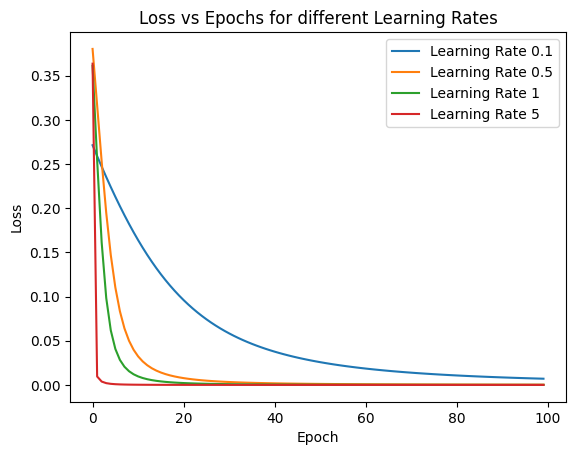

In [8]:
# plotting the graph of all these arrays
import matplotlib.pyplot as plt

plt.plot(loss_list_l1, label = 'Learning Rate 0.1')
plt.plot(loss_list_l2, label = 'Learning Rate 0.5')
plt.plot(loss_list_l3, label = 'Learning Rate 1')
plt.plot(loss_list_l4, label = 'Learning Rate 5')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for different Learning Rates')
plt.legend()

# Show the plot
plt.show()